<a href="https://colab.research.google.com/github/HARSHIT097/PYTORCH_LEARN/blob/main/pYTORCH001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics

In [709]:
#!pip install torch
import torch


In [710]:
v = torch.tensor([1, 2, 3])
print(v.dtype)

torch.int64


In [711]:
f = torch.FloatTensor([1, 2, 3,4])
f

tensor([1., 2., 3., 4.])

In [712]:
f.size()

torch.Size([4])

In [713]:
#in dimension
f.view(2,2)

tensor([[1., 2.],
        [3., 4.]])

In [714]:
#converting a numpy array to tensor
import numpy as np

a = np.array([1,2,3,4,5,6])
ten_cnv = torch.from_numpy(a)
print(ten_cnv)



tensor([1, 2, 3, 4, 5, 6])


In [715]:
ten_cnv.type()

'torch.LongTensor'

In [716]:
#vice versa
numpy_cnv = ten_cnv.numpy()
numpy_cnv

array([1, 2, 3, 4, 5, 6])

In [717]:
t_one = torch.tensor([1,2,3])
t_two = torch.tensor([3,2,5])

t_one*5

tensor([ 5, 10, 15])

In [718]:
t_one + t_two

tensor([4, 4, 8])

In [719]:
torch.dot(t_one, t_two)

tensor(22)

In [720]:
#equally spaced nmmbers
torch.linspace(0,10,50)

tensor([ 0.0000,  0.2041,  0.4082,  0.6122,  0.8163,  1.0204,  1.2245,  1.4286,
         1.6327,  1.8367,  2.0408,  2.2449,  2.4490,  2.6531,  2.8571,  3.0612,
         3.2653,  3.4694,  3.6735,  3.8776,  4.0816,  4.2857,  4.4898,  4.6939,
         4.8980,  5.1020,  5.3061,  5.5102,  5.7143,  5.9184,  6.1224,  6.3265,
         6.5306,  6.7347,  6.9388,  7.1429,  7.3469,  7.5510,  7.7551,  7.9592,
         8.1633,  8.3673,  8.5714,  8.7755,  8.9796,  9.1837,  9.3878,  9.5918,
         9.7959, 10.0000])

In [721]:
x = torch.linspace(0,10,50)
#y = torch.exp(x)
y = torch.cos(x)

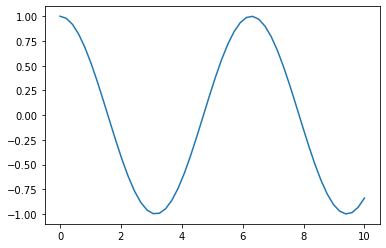

In [722]:
#plotiing the above value using matplotlib

import matplotlib.pyplot as plt
#x and y must be numpy arrays not tensors
plt.plot(x.numpy(),y.numpy())

In [723]:
# 2 dimensional tensors

one_d = torch.arange(0,6)
one_d

tensor([0, 1, 2, 3, 4, 5])

In [724]:
two_d = one_d.view(3,2)
two_d

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [725]:
two_d.dim()

2

In [726]:
two_d[2,1]

tensor(5)

In [727]:
#3 d

x = torch.arange(27).view(3, 3,3)

In [728]:
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [729]:
x[1,0:3,0:3]

tensor([[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]])

In [730]:
x[2,:,:]

tensor([[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]])

In [731]:
#mat multiplication
mat_a = torch.tensor([0,3,2,5,5,8]).view(3,2)
mat_a

tensor([[0, 3],
        [2, 5],
        [5, 8]])

In [732]:
mat_b = torch.tensor([0,3,2,5,5,8]).view(2,3)
mat_b

tensor([[0, 3, 2],
        [5, 5, 8]])

In [733]:
mat_a @ mat_b

tensor([[15, 15, 24],
        [25, 31, 44],
        [40, 55, 74]])

In [734]:
torch.matmul(mat_a, mat_b)

tensor([[15, 15, 24],
        [25, 31, 44],
        [40, 55, 74]])

In [735]:
#gradient/ differential 

x = torch.tensor(2.0, requires_grad=True)
y = 8*x**4 + 7*x**3 + 4*x**2 + 2*x + 1
y.backward()
x.grad

tensor(358.)

In [736]:
#partial derrivatives
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z **3
y.backward()
x.grad

tensor(2.)

In [737]:
z.grad

tensor(12.)

# Modelling - Linear Regression

## Creating a model and understanding it from scratch

In [738]:
import torch

In [739]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [740]:
def forward(x):
  y = w*x +b
  return y

In [741]:
x=torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [742]:
x=torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [743]:
#from nn class importing linear function
from torch.nn import Linear

In [744]:
torch.manual_seed(5)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.7478], requires_grad=True) Parameter containing:
tensor([[0.6605]], requires_grad=True)


In [745]:
x = torch.tensor([[2.0], [3.3], [4.2]])
print(model(x))

tensor([[0.5732],
        [1.4319],
        [2.0263]], grad_fn=<AddmmBackward>)


In [746]:
##using class method

import torch
import torch.nn as nn
class LR(nn.Module):
     #using inheritance
     #creating constructor
     def __init__(self, input_size, output_size):
       super().__init__()
       self.linear = nn.Linear(input_size, output_size)
     def forward(self,x):
       
       pred = self.linear(x)
       return pred

torch.manual_seed(5)
model = LR(1,1)
print(list(model.parameters()))

x = torch.tensor([[2.0], [3.3], [4.2]])
print(model.forward(x))

[Parameter containing:
tensor([[0.6605]], requires_grad=True), Parameter containing:
tensor([-0.7478], requires_grad=True)]
tensor([[0.5732],
        [1.4319],
        [2.0263]], grad_fn=<AddmmBackward>)


Text(0.5, 0, 'x - values')

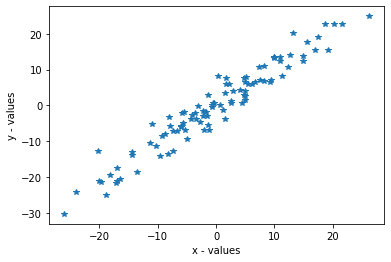

In [747]:
import matplotlib.pyplot as plt

x = torch.randn(100, 1)*10
y = x + torch.randn(100, 1)*3
plt.plot(x.numpy(), y.numpy(), "*")
plt.ylabel("y - values")
plt.xlabel("x - values")

In [748]:

torch.manual_seed(5)
model = LR(1,1)
print(model)
[w, b] = model.parameters()
print(w, b)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Parameter containing:
tensor([[0.6605]], requires_grad=True) Parameter containing:
tensor([-0.7478], requires_grad=True)


In [749]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.6605037450790405 -0.7477781772613525


In [750]:
# creating function
def get_params():
  return (w[0][0].item(), b[0].item())

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30]) 
  y1 = w1*x1 + b1
  plt.plot(x1, y1, "r")
  plt.scatter(x, y)
  plt.show()

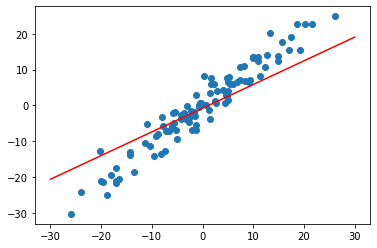

In [751]:
plot_fit("first/Initial model")

## loss function and gradient descent

First we compute the derrivative of loss function then
subtract the current weight value of the line.

Whatever that wt may be, this will give the gradient value f'(w)


w1 = w0 - f'(w)

By this we have new updated weights, which results into smaler error.

On keep iterating we reach to the optimal solution/ parametrs for our model to fit the data

the steps should be small so multiplying it with a smaller value which is n
known as learning rate.

In [752]:
#training code and implementation

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [753]:
epochs = 20
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss: 27.122480392456055
epoch: 1 loss: 19.888689041137695
epoch: 2 loss: 15.629812240600586
epoch: 3 loss: 13.121994972229004
epoch: 4 loss: 11.644871711730957
epoch: 5 loss: 10.77442741394043
epoch: 6 loss: 10.261083602905273
epoch: 7 loss: 9.957934379577637
epoch: 8 loss: 9.77851390838623
epoch: 9 loss: 9.67192268371582
epoch: 10 loss: 9.608203887939453
epoch: 11 loss: 9.569725036621094
epoch: 12 loss: 9.546104431152344
epoch: 13 loss: 9.53123664855957
epoch: 14 loss: 9.521520614624023
epoch: 15 loss: 9.51484489440918
epoch: 16 loss: 9.509960174560547
epoch: 17 loss: 9.506134033203125
epoch: 18 loss: 9.502934455871582
epoch: 19 loss: 9.500107765197754


Text(0.5, 0, 'epoch')

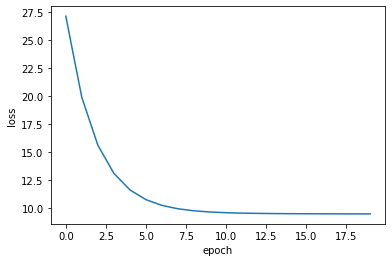

In [754]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")
#plt.title("calculating loss per epoch")

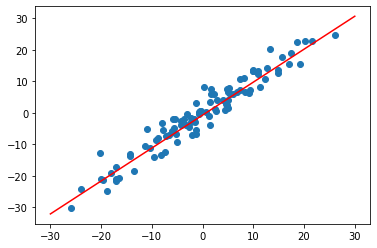

In [755]:
plot_fit("trained mOdel")

# Perceptron Model


In [756]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [757]:
#creating datasets
n_pts = 100
centres = [[-0.5, 0.5], [0.5, -0.5]]

x, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centres, cluster_std=0.4)
print(x)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

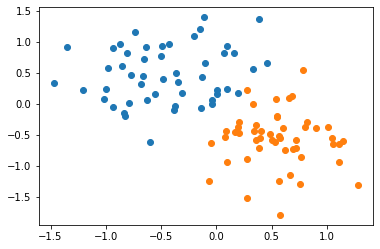

In [758]:
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])

In [759]:
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(100, 1))

In [760]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()   #class inheritance
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [761]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [762]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
print(w1.item(), w2.item(), b1.item())

0.1622033268213272 -0.1682732254266739 0.1939089596271515


In [763]:
def get_params():
  return (w1.item(), w2.item(), b[0].item())

def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  #0 =w1x1 + y2x2 + b
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, "g")
  scatter_plot()

def scatter_plot():
  plt.scatter(x[y==0, 0], x[y==0, 1])
  plt.scatter(x[y==1, 0], x[y==1, 1])

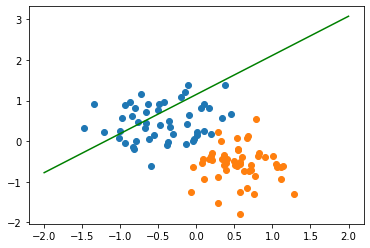

In [764]:
plot_fit("initial model")

In [765]:
#training code and implementation

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [766]:
epochs = 3000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()    #setting gradient to zero
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6164200305938721
epoch: 3 loss: 0.6153795123100281
epoch: 4 loss: 0.6143423318862915
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.612278401851654
epoch: 7 loss: 0.6112514734268188
epoch: 8 loss: 0.6102280020713806
epoch: 9 loss: 0.6092078685760498
epoch: 10 loss: 0.6081911325454712
epoch: 11 loss: 0.607177734375
epoch: 12 loss: 0.6061676740646362
epoch: 13 loss: 0.6051609516143799
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031573414802551
epoch: 16 loss: 0.6021605730056763
epoch: 17 loss: 0.6011670231819153
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.5991896986961365
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972253680229187
epoch: 22 loss: 0.5962480306625366
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943029522895813
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923706293106079
epoch: 27 loss: 0.5914091467857361
epoch: 28 loss: 0.5904508233070374
ep

Text(0.5, 0, 'epoch')

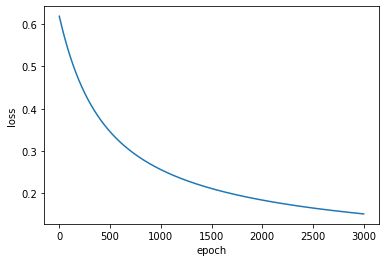

In [767]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")
#plt.title("calculating loss per epoch")

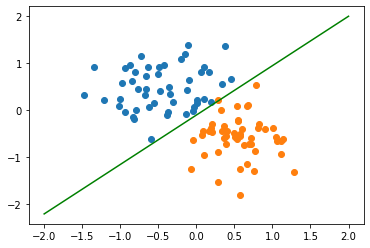

In [768]:
plot_fit("trained mOdel")

Red point Positive Probability =0.9900645613670349
Black point Positive Probability =0.006189143750816584
Red point in Class =1
Black point in Class =0


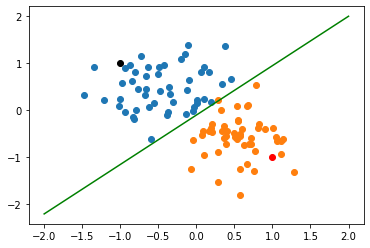

In [771]:
#model testing

point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")

print("Red point Positive Probability ={}".format(model.forward(point1).item()))
print("Black point Positive Probability ={}".format(model.forward(point2).item()))

print("Red point in Class ={}".format(model.predict(point1)))
print("Black point in Class ={}".format(model.predict(point2)))
plot_fit("trained Model")

# New Section